In [13]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)
import numpy as np
import seaborn as sb
home=pd.read_csv('C:\\Users\\BHASWANTH REDDY\\Desktop\\BangloreHack\\Data\\train.csv')
home.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


<AxesSubplot:>

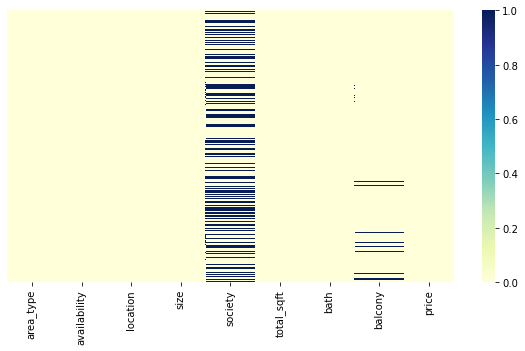

In [14]:
plt.figure(figsize=(10,5))
sb.heatmap(home.isnull(),cbar=True,cmap="YlGnBu",yticklabels=False)

In [21]:
home.isnull().sum()

area_type     0
location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [19]:
home[home['size'].isna()]

,area_type,location,size,total_sqft,bath,balcony,price
579,Plot Area,Sarjapur Road,NaN,1200 - 2400,NaN,NaN,34.185
1775,Plot Area,IVC Road,NaN,2000 - 5634,NaN,NaN,124.000
2264,Plot Area,Banashankari,NaN,2400,NaN,NaN,460.000
2809,Plot Area,Sarjapur Road,NaN,1200 - 2400,NaN,NaN,28.785
2862,Plot Area,Devanahalli,NaN,1500 - 2400,NaN,NaN,46.800
5333,Plot Area,Devanahalli,NaN,2100 - 5405,NaN,NaN,177.115
6423,Plot Area,Whitefield,NaN,2324,NaN,NaN,26.730
6636,Plot Area,Jigani,NaN,1500,NaN,NaN,25.490
6719,Plot Area,Hoskote,NaN,800 - 2660,NaN,NaN,28.545
7680,Plot Area,Kasavanhalli,NaN,5000,NaN,NaN,400.000


In [4]:
home[['size']].value_counts().values[:10]

array([5199, 4310,  826,  591,  547,  538,  329,  297,  191,  105],
      dtype=int64)

In [15]:
home=home.drop(columns=['availability','society'],axis=1)

In [16]:
home=home[~(home.location.isna())]

In [8]:
home.columns

Index(['area_type', 'location', 'size', 'total_sqft', 'bath', 'balcony',
       'price'],
      dtype='object')

In [10]:
home.area_type.value_counts()

Super built-up  Area    8789
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [535]:
home.balcony.value_counts()

2.0    5113
1.0    4897
3.0    1672
0.0    1029
Name: balcony, dtype: int64

In [20]:
home.fillna(value=2,inplace=True)

In [12]:
home.head()

AttributeError: 'list' object has no attribute 'head'

In [15]:
home['size'][4200].split()

['2', 'BHK']

In [17]:
home=home[~(home['size'].isna())]

In [18]:
home['size']=home['size'].apply(lambda x:x.split()[0])

In [6]:
home=home.dropna()

In [9]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [22]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [23]:
df4 = home.copy()
df4.total_sqft = df4.total_sqft.apply(convert_sqft_to_num)
df4 = df4[df4.total_sqft.notnull()]
df4.head(2)

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2,1056.0,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4,2600.0,5.0,3.0,120.00


In [11]:
df5 = df4.copy()
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']
df5.head()

,area_type,location,size,total_sqft,bath,balcony,price,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2,1056.0,2.0,1.0,39.07,3699.810606
1,Plot Area,Chikka Tirupathi,4,2600.0,5.0,3.0,120.00,4615.384615
2,Built-up Area,Uttarahalli,3,1440.0,2.0,3.0,62.00,4305.555556
3,Super built-up Area,Lingadheeranahalli,3,1521.0,3.0,1.0,95.00,6245.890861
4,Super built-up Area,Kothanur,2,1200.0,2.0,1.0,51.00,4250.000000


In [24]:
df5 = df4.copy()
df5.location = df5.location.apply(lambda x: x.strip())
df5.area_type = df5.area_type.apply(lambda x: x.strip())
location_stats = df5['location'].value_counts(ascending=False)
location_stats

Whitefield              538
Sarjapur  Road          397
Electronic City         304
Kanakpura Road          271
Thanisandra             236
                       ... 
Ckikkakammana Halli       1
HOSUR RMAIN ROAD          1
Hosahalli                 1
Uvce Layout               1
Maruthi nagar kogilu      1
Name: location, Length: 1287, dtype: int64

In [14]:
from geopy.geocoders import Nominatim

In [27]:
location_stats_less_than_10 = location_stats[location_stats<10]

In [16]:
len(location_stats_less_than_10)

1001

In [28]:
df5.location = df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df5.location.unique())

255

In [18]:
df5.shape

(12668, 8)

In [29]:
df6 = df5
df6.shape

(13257, 7)

In [30]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-2*st)) & (subdf.price_per_sqft<=(m+2*st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df7 = df6  #remove_pps_outliers(df6)
df7.shape

(13257, 7)

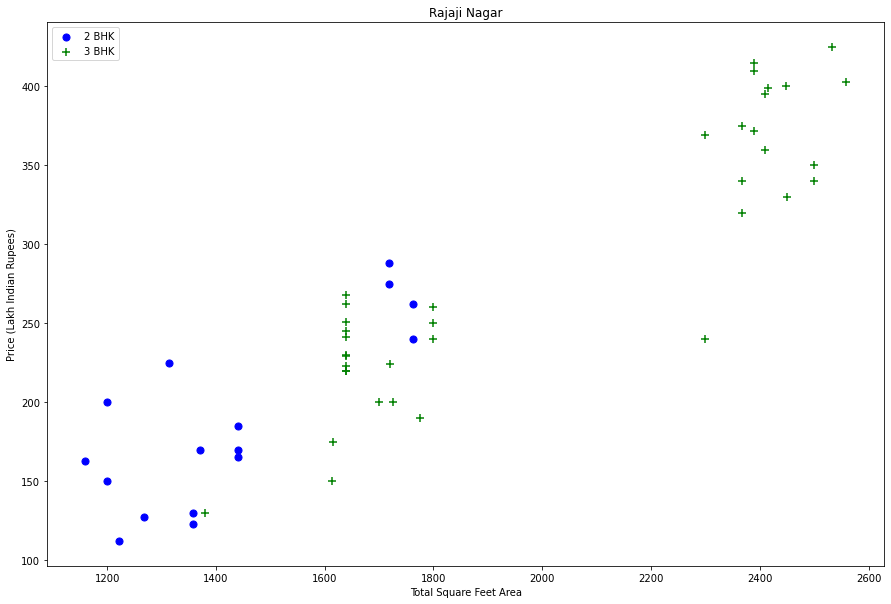

In [579]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df7,"Rajaji Nagar")

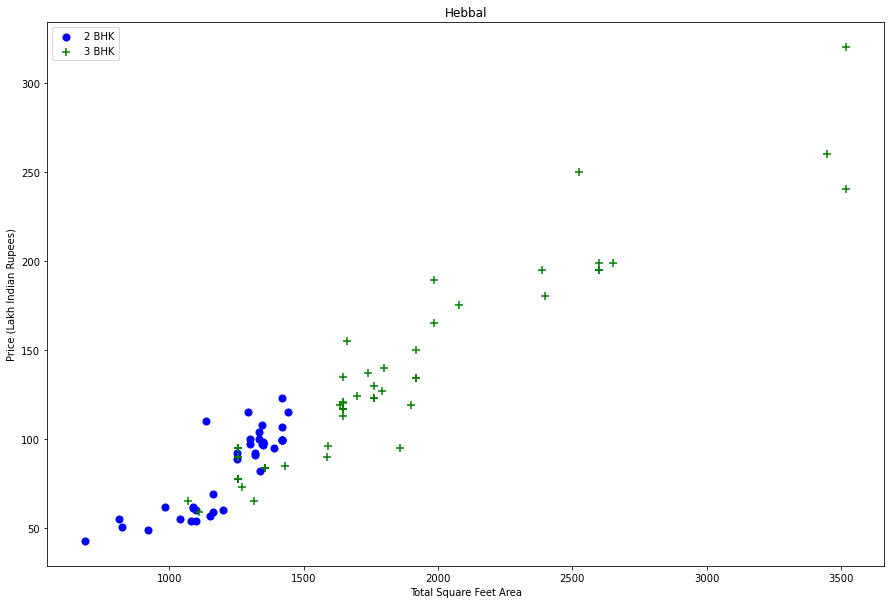

In [358]:
plot_scatter_chart(df7,"Hebbal")

In [31]:

def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('size'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('size'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>50:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
#df8 = remove_bhk_outliers(df7)
df8 = df7.copy()
df8.shape

(13257, 7)

In [32]:
df9 = df8  #[df8.bath<df8.size+2]
df9.shape

(13257, 7)

In [33]:
df10 = df9  #.drop(['price_per_sqft'],axis='columns')

In [34]:
dummies = pd.get_dummies(df10.area_type)
dummies.head(3)

,Built-up Area,Carpet Area,Plot Area,Super built-up Area
0,0,0,0,1
1,0,0,1,0
2,1,0,0,0


In [35]:
col1=dummies.columns.values
col1

array(['Built-up  Area', 'Carpet  Area', 'Plot  Area',
       'Super built-up  Area'], dtype=object)

In [36]:
df11 = pd.concat([df10,dummies],axis='columns')
df11.head()

,area_type,location,size,total_sqft,bath,balcony,price,Built-up Area,Carpet Area,Plot Area,Super built-up Area
0,Super built-up Area,Electronic City Phase II,2,1056.0,2.0,1.0,39.07,0,0,0,1
1,Plot Area,Chikka Tirupathi,4,2600.0,5.0,3.0,120.00,0,0,1,0
2,Built-up Area,Uttarahalli,3,1440.0,2.0,3.0,62.00,1,0,0,0
3,Super built-up Area,Lingadheeranahalli,3,1521.0,3.0,1.0,95.00,0,0,0,1
4,Super built-up Area,Kothanur,2,1200.0,2.0,1.0,51.00,0,0,0,1


In [37]:
df11.location.value_counts()

other                  2733
Whitefield              538
Sarjapur  Road          397
Electronic City         304
Kanakpura Road          271
                       ... 
Basapura                 10
Kalkere                  10
Nagadevanahalli          10
Sector 1 HSR Layout      10
Ganga Nagar              10
Name: location, Length: 255, dtype: int64

In [38]:
dum=pd.get_dummies(df11.location)
dum

,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13315,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
13316,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
13317,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13318,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
col2=dum.columns.values

In [40]:
df=pd.concat([df11,dum],axis=1)
df.head()

,area_type,location,size,total_sqft,bath,balcony,price,Built-up Area,Carpet Area,Plot Area,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,Super built-up Area,Electronic City Phase II,2,1056.0,2.0,1.0,39.07,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Plot Area,Chikka Tirupathi,4,2600.0,5.0,3.0,120.00,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,Built-up Area,Uttarahalli,3,1440.0,2.0,3.0,62.00,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Super built-up Area,Lingadheeranahalli,3,1521.0,3.0,1.0,95.00,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Super built-up Area,Kothanur,2,1200.0,2.0,1.0,51.00,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
geolocator = Nominatim(user_agent="Ruch")
def feature_generation(df):
    d=dict()
    a=[]
    b=[]
    c=0
    for i in df['location']: 
        if(d.get(i)!=None):
            a.append(d[i][0])
            b.append(d[i][1])
            continue
        location = geolocator.geocode(i)
        c+=1
        if(location==None):
            d[i]=[-1,-1]
            a.append(d[i][0])
            b.append(d[i][1])
            continue
        d[i]=[location.latitude,location.longitude]
        a.append(d[i][0])
        b.append(d[i][1])
    df['Latitude']=a
    df['Longitude']=b
    return (df,d)

In [29]:
t=feature_generation(df11)
df=t[0]  #new_dataframe
dic=t[1] #stroring loc co-ordinates in dictionary

1 Jayanagar, Rashtriya Vidyalaya Road, Jayanagar 8th Block, Pattabhiram Nagar, South Zone, Bengaluru, Bangalore South, Bangalore Urban, Karnataka, - 560011, India
2 1st Cross Road, Koramangala 2nd Block, Koramangala, South Zone, Bengaluru, Bangalore South, Bangalore Urban, Karnataka, 560034, India
3 BangaloreOne, JP Nagar, 13th Cross Road, J P Nagar, JP Nagar 1st Phase, South Zone, Bengaluru, Bangalore South, Bangalore Urban, Karnataka, 560 078, India
4 2nd Main Road, Thalaghattapura, Hemmigepura, Rajarajeshwari Nagar Zone, Bengaluru, Bangalore South, Bangalore Urban, Karnataka, 560108, India
5 None
6 1st Cross Road, Sarakki, JP Nagar 1st Phase, Jayanagar 8th Block, Shakambari Nagar, South Zone, Bengaluru, Bangalore South, Bangalore Urban, Karnataka, 5600011, India
7 6th Main Road, JP Nagar 2nd Phase, J P Nagar, South Zone, Bengaluru, Bangalore South, Bangalore Urban, Karnataka, 560069, India
8 7th Main Road, JP Nagar 2nd Phase, J P Nagar, South Zone, Bengaluru, Bangalore South, Bangal

In [115]:
c=0
for i,j in dic.items():
    if(j==[-1,-1]):
        print(i)
    elif(i=='other'):
        print(j)

2nd Stage Nagarbhavi
Babusapalaya
Badavala Nagar
Battarahalli
Bhoganhalli
Billekahalli
Binny Pete
Bisuvanahalli
GM Palaya
Gollarapalya Hosahalli
Kasavanhalli
Kereguddadahalli
Kodigehaali
Kothannur
Kumaraswami Layout
Lakshminarayana Pura
Lingadheeranahalli
Margondanahalli
Munnekollal
NGR Layout
Neeladri Nagar
Sarjapura - Attibele Road
Somasundara Palya
Sultan Palaya
Vishveshwarya Layout
Vishwapriya Layout
[18.339467300000003, -77.33036119610459]


In [82]:
df.location=df.location.apply(lambda x: x if x not in dic else 'other')

AttributeError: 'DataFrame' object has no attribute 'location'

In [118]:
df.columns

Index(['area_type', 'location', 'size', 'total_sqft', 'bath', 'balcony',
       'price', 'Built-up  Area', 'Carpet  Area', 'Plot  Area',
       'Super built-up  Area', 'Latitude', 'Longitude'],
      dtype='object')

In [41]:
df = df.drop(columns=['area_type', 'location'],axis=1)
df.head()

,size,total_sqft,bath,balcony,price,Built-up Area,Carpet Area,Plot Area,Super built-up Area,1st Block Jayanagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,2,1056.0,2.0,1.0,39.07,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,4,2600.0,5.0,3.0,120.00,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1440.0,2.0,3.0,62.00,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,1521.0,3.0,1.0,95.00,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2,1200.0,2.0,1.0,51.00,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [85]:
y = df.price

In [83]:
X=np.array(df.drop('price',axis=1))

In [96]:
X.shape

(13257, 263)

In [49]:
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor,AdaBoostRegressor,GradientBoostingRegressor,BaggingRegressor,StackingRegressor,VotingRegressor
from sklearn.tree import DecisionTreeRegressor,ExtraTreeRegressor
from sklearn.linear_model import ARDRegression,GammaRegressor,HuberRegressor,LinearRegression,PassiveAggressiveRegressor,TweedieRegressor,TheilSenRegressor,SGDRegressor,PoissonRegressor,RANSACRegressor
#from mlxtend.regressor import StackingRegressor,LinearRegression
from lightgbm import LGBMRegressor
from tpot import TPOTRegressor
from catboost import CatBoostRegressor

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [262]:
lr_clf = BaggingRegressor(n_estimators=50)
lr_clf.fit(X,y)
lr_clf.score(X,y)

0.9325852710135984

In [155]:
col1

array(['Built-up  Area', 'Carpet  Area', 'Plot  Area',
       'Super built-up  Area'], dtype=object)

In [53]:
cols=list(X.columns.values)

In [185]:
len(cols)

256

In [172]:
np.where(col1=='Super built-up  Area')[0][0]

3

In [51]:
def predict_price(location,sqft,bath,bal,bhk,area):    
    x = np.zeros(len(cols))
    x[0] = bhk
    x[1] = sqft
    x[2] = bath
    X[3] = bal
    x[4+np.where(col1==area)[0][0]]=1
    if location in col2:
        x[8+np.where(col2==location)[0][0]]=1
    else:
        x[255]=1
    return lr_clf.predict([x])[0]

In [263]:
predict_price('Brookefield',1500,4,1,2,'Carpet  Area')
#np.where(cols==3)[0].shape[0]

188.66969999999998

In [640]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler

In [764]:
mod=RandomForestRegressor()
mod.fit(X,y)

RandomForestRegressor()

In [51]:
X.balcony.value_counts()

2.0    3021
1.0    2933
3.0     794
0.0     516
Name: balcony, dtype: int64

In [56]:
test=pd.read_csv('C:\\Users\\BHASWANTH REDDY\\Desktop\\BangloreHack\\Data\\test.csv')
test.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,Ready To Move,Brookefield,2 BHK,Roeekbl,1225,2.0,2.0,NaN
1,Plot Area,Ready To Move,Akshaya Nagar,9 Bedroom,NaN,2400,9.0,2.0,NaN
2,Plot Area,18-Apr,Hennur Road,4 Bedroom,Saandtt,1650,5.0,2.0,NaN
3,Super built-up Area,Ready To Move,Kodichikkanahalli,3 BHK,Winerri,1322,3.0,1.0,NaN
4,Super built-up Area,Ready To Move,Konanakunte,2 BHK,AmageSa,1161,2.0,1.0,NaN


In [159]:
predict_price('Brookefield',1500,2,1,2,'Super built-up  Area')

75.0

In [57]:
tes=test.drop(columns=['society','price'],axis=1)
tes.head()

,area_type,availability,location,size,total_sqft,bath,balcony
0,Super built-up Area,Ready To Move,Brookefield,2 BHK,1225,2.0,2.0
1,Plot Area,Ready To Move,Akshaya Nagar,9 Bedroom,2400,9.0,2.0
2,Plot Area,18-Apr,Hennur Road,4 Bedroom,1650,5.0,2.0
3,Super built-up Area,Ready To Move,Kodichikkanahalli,3 BHK,1322,3.0,1.0
4,Super built-up Area,Ready To Move,Konanakunte,2 BHK,1161,2.0,1.0


In [196]:
tes.isnull().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
dtype: int64

In [58]:
tes['size']=tes['size'].fillna('2 b')
tes['bath']=tes['bath'].fillna(2.0)
tes['balcony']=tes['balcony'].fillna(2.0)

In [59]:
tes['size'] = tes['size'].apply(lambda x: int(x.split(' ')[0]))
tes.head()

,area_type,availability,location,size,total_sqft,bath,balcony
0,Super built-up Area,Ready To Move,Brookefield,2,1225,2.0,2.0
1,Plot Area,Ready To Move,Akshaya Nagar,9,2400,9.0,2.0
2,Plot Area,18-Apr,Hennur Road,4,1650,5.0,2.0
3,Super built-up Area,Ready To Move,Kodichikkanahalli,3,1322,3.0,1.0
4,Super built-up Area,Ready To Move,Konanakunte,2,1161,2.0,1.0


In [60]:
def find(arr,n):
    t=np.where(arr==n)[0]
    if(t.size==0):
        return -1
    return t[0]

In [61]:
length1=col1.size

In [62]:
m,n=tes.shape

In [63]:
tes=tes.drop('availability',axis=1)

In [64]:
tes.head()

,area_type,location,size,total_sqft,bath,balcony
0,Super built-up Area,Brookefield,2,1225,2.0,2.0
1,Plot Area,Akshaya Nagar,9,2400,9.0,2.0
2,Plot Area,Hennur Road,4,1650,5.0,2.0
3,Super built-up Area,Kodichikkanahalli,3,1322,3.0,1.0
4,Super built-up Area,Konanakunte,2,1161,2.0,1.0


In [65]:
tes.total_sqft = tes.total_sqft.apply(convert_sqft_to_num)
#df4 = df4[df4.total_sqft.notnull()]


In [66]:
tes.head()

,area_type,location,size,total_sqft,bath,balcony
0,Super built-up Area,Brookefield,2,1225.0,2.0,2.0
1,Plot Area,Akshaya Nagar,9,2400.0,9.0,2.0
2,Plot Area,Hennur Road,4,1650.0,5.0,2.0
3,Super built-up Area,Kodichikkanahalli,3,1322.0,3.0,1.0
4,Super built-up Area,Konanakunte,2,1161.0,2.0,1.0


In [67]:
tes.total_sqft[874]=100
tes.total_sqft[325]=20234.282

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [236]:
tes[tes.total_sqft.isna()]


,area_type,location,size,total_sqft,bath,balcony


In [215]:
tes.head()

,area_type,location,size,total_sqft,bath,balcony
0,Super built-up Area,Brookefield,2,1225.0,2.0,2.0
1,Plot Area,Akshaya Nagar,9,2400.0,9.0,2.0
2,Plot Area,Hennur Road,4,1650.0,5.0,2.0
3,Super built-up Area,Kodichikkanahalli,3,1322.0,3.0,1.0
4,Super built-up Area,Konanakunte,2,1161.0,2.0,1.0


In [405]:
X.shape
loc[0]

'Brookefield'

In [252]:
#location,sqft,bath,bal,bhk,area
y_test=[]
for i in range(m):
    y_test.append(predict_price(tes.location.loc[i],tes.total_sqft.loc[i],tes.bath.loc[i],tes.balcony.loc[i],tes['size'].loc[i],tes.area_type.loc[i]))
y_test=pd.DataFrame(data=y_test,columns=['price'])
y_test.head()

,price
0,75.985575
1,336.526080
2,230.868331
3,49.113601
4,2.240535


In [253]:
test=test.drop('price',axis=1)
test['price']=y_test

In [254]:
test.to_csv('C:\\Users\\BHASWANTH REDDY\\Desktop\\BangloreHack\\Data\\res.csv',index=False)